## Initial Setup

In [1]:
#Do all necessary Pacakge Imports
from imports import *

In [2]:
#Create a dataHandler class for our dataframe 
data = dh()

In [3]:
#Get Data for crisis in asia and southern asia
southern_asia_df = data.filter_data(region=['Southern Asia', 'South-Eastern Asia'])
asia_df = data.filter_data(region=['Middle East', 'Southern Asia', 'South-Eastern Asia'])

#Get Data for crisis in asia and southern asia caused by rebel groups
asia_rebel_groups_df = data.filter_data(region=['Middle East', 'Southern Asia', 'South-Eastern Asia'], rebel_groups=True)
southern_asia_rebel_groups_df = data.filter_data(region=['Southern Asia'], rebel_groups=True)

## Predictors of Interest

#### 1: Fatalities
#### 2: Event Type
#### 3: Sub Event Type
#### 4: Associate Actor 1 
#### 5: Actor 2 
#### 6: Inter 2
#### 7: Interaction
#### 8: Region
#### 9: Admin 1
#### 10: Admin 2
#### 11: Admin 3
#### 12: Location
#### 13: Associate Actor 2
#### 14: Country

NOTE: To better understand the predictors look at documentation in Understanding_data folder.

## Types of Actors involved in Crisis Dataset

#### 1: State Forces
#### 2: Rebel Groups
#### 3: Political Militias
#### 4: Identity Militias
#### 5: Rioters
#### 6: Protestors
#### 7: Civilian
#### 8: External/Other Forces

## Crisis Data Initial Exploration for Asia

##### Crisis to Fatalities per Country caused by All Actors[2017-2019]

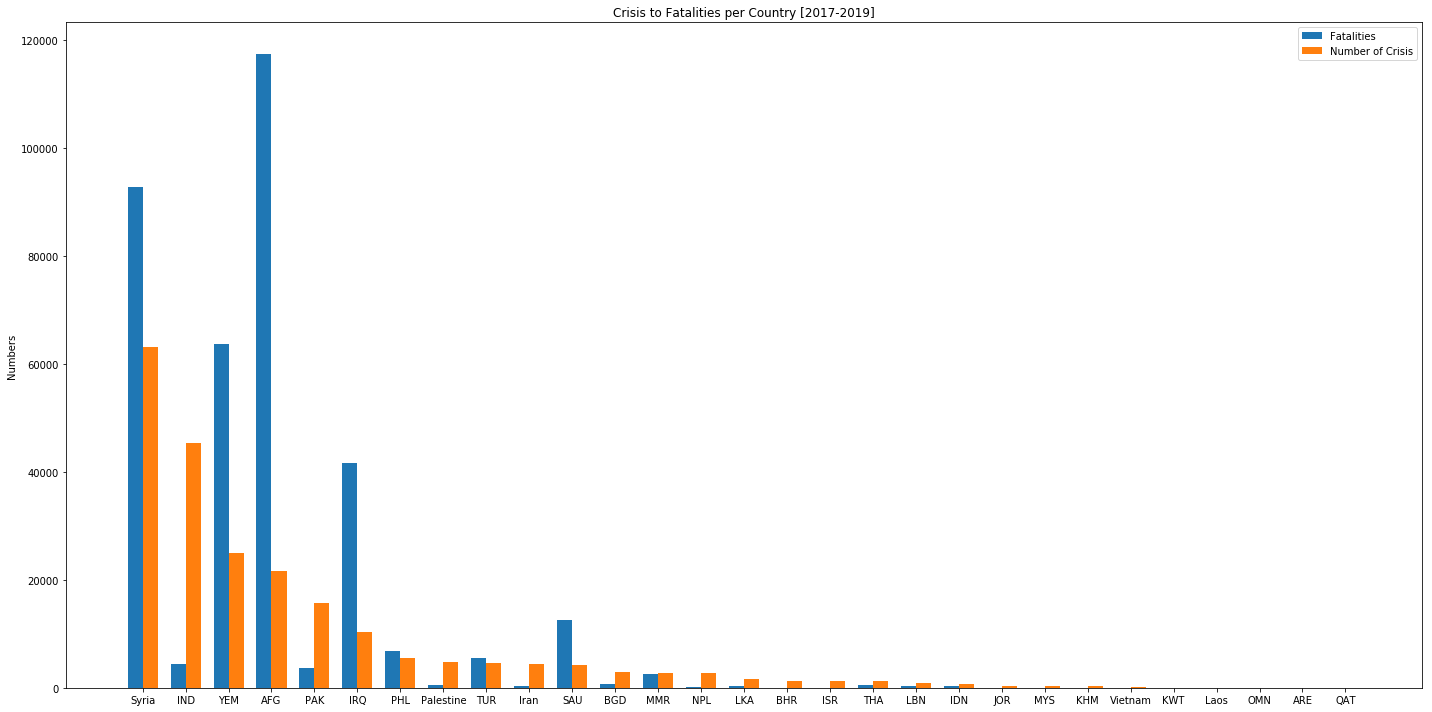

In [7]:
data.crisis_to_fatalities_graph(asia_df, 'country_paired')

##### Number of Crisis caused by all Actors per Country[2017-2019]

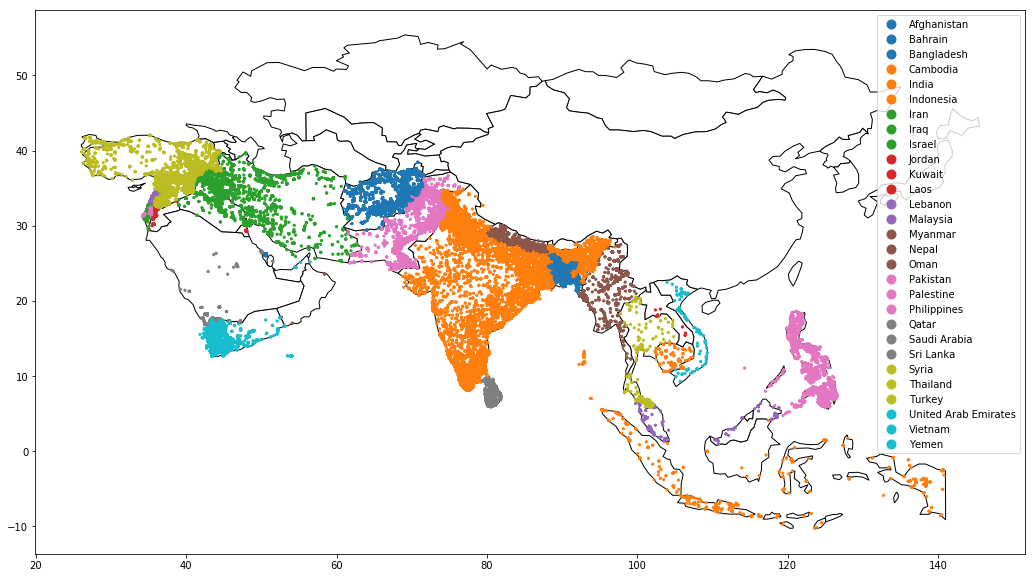

In [9]:
data.crisis_to_fatalities_graph(asia_df, type='crisis map')

##### Crisis to Fatalities per Country caused by Rebel Groups[2017-2019]

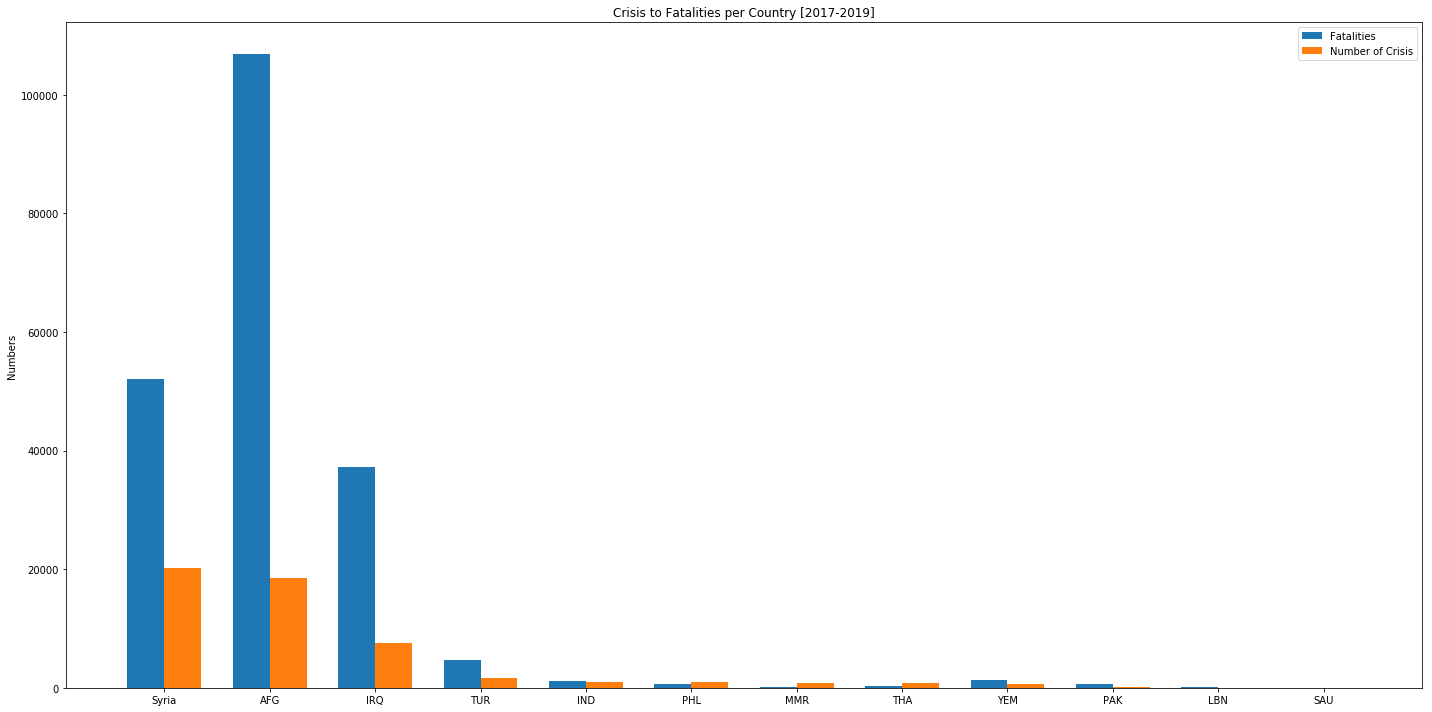

In [6]:
data.crisis_to_fatalities_graph(asia_rebel_groups_df, 'country_paired')

##### Number of Crisis caused by Rebel Groups per Country[2017-2019]

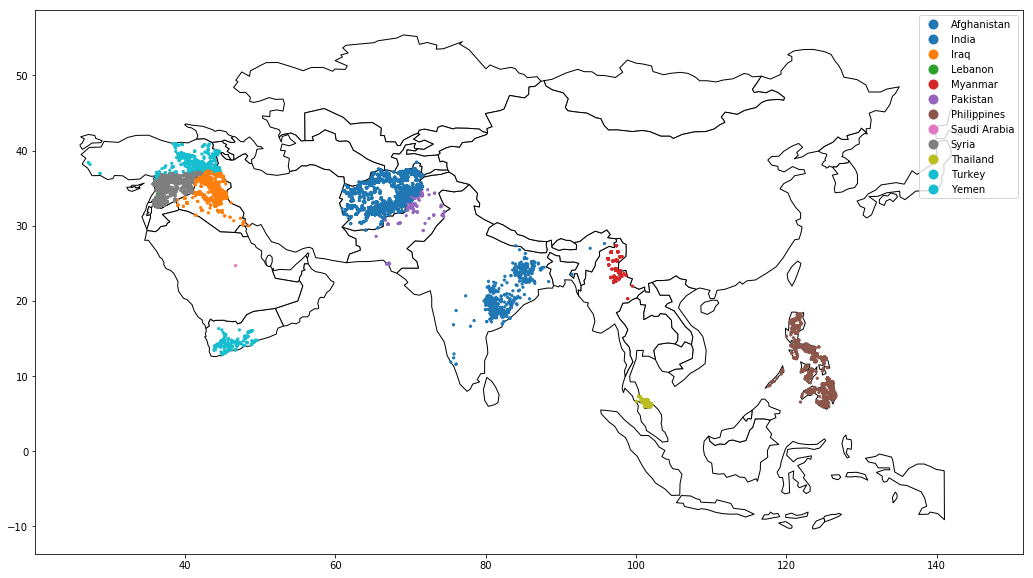

In [10]:
data.crisis_to_fatalities_graph(asia_rebel_groups_df, type='crisis map')

##### Crisis to Fatalities per Event Type caused by All Actors[2017-2019]

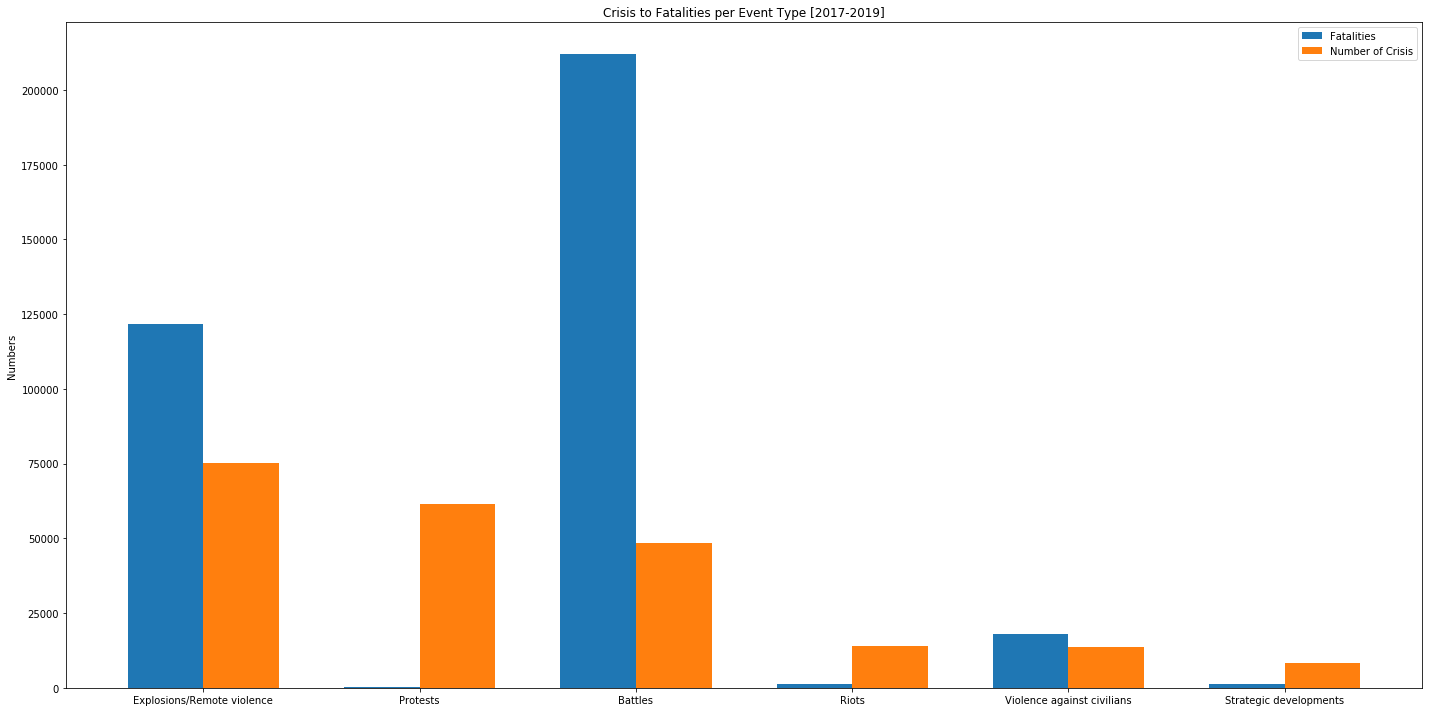

In [4]:
data.crisis_to_fatalities_graph(asia_df, type='event_paired')

##### Crisis to Fatalities per Country caused by Rebel Groups[2017-2019]

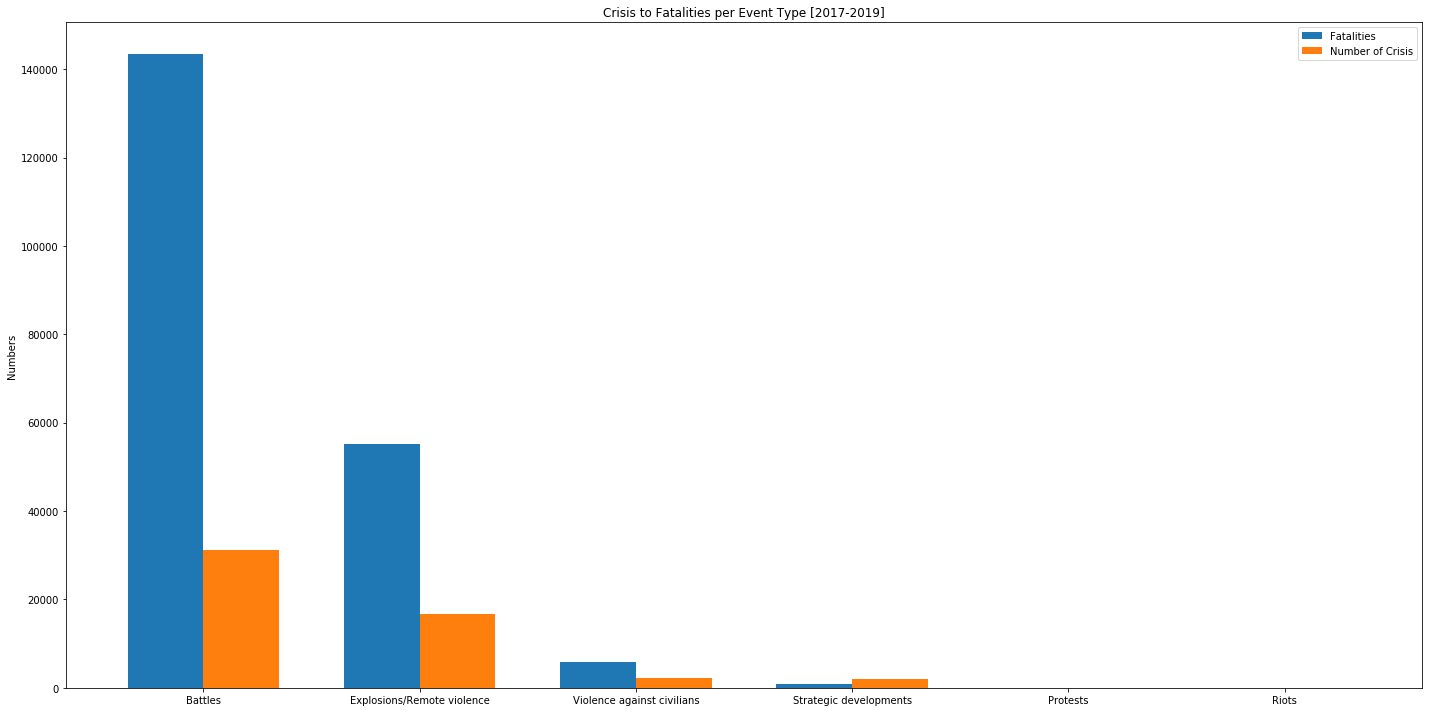

In [7]:
data.crisis_to_fatalities_graph(asia_rebel_groups_df, type='event_paired')

## Random Forest Model for Classifying Rebel Groups in Afghanistan

##### Creating best random forest for Afghanistan by Grid Search

In [6]:
#Get Data for crisis in Afghanistan caused by rebel groups
afg_rebel_groups_df = data.filter_data(country=['Afghanistan'], rebel_groups=True)
#Get Random Forest [the best parameters have been found using grid search]
afg_rebel_groups_rf = data.random_forest(afg_rebel_groups_df, max_depth= 30, min_samples_leaf=1, min_samples_split = 10, n_estimators=500, model_name = 'afghanistan')

##### Load best Random Forest model based of grid search for Afghanistan

In [8]:
asia_rebel_groups_rf = data.load_model('Afghanistan')

##### Confusion Matrix for Training Data [Normalized]


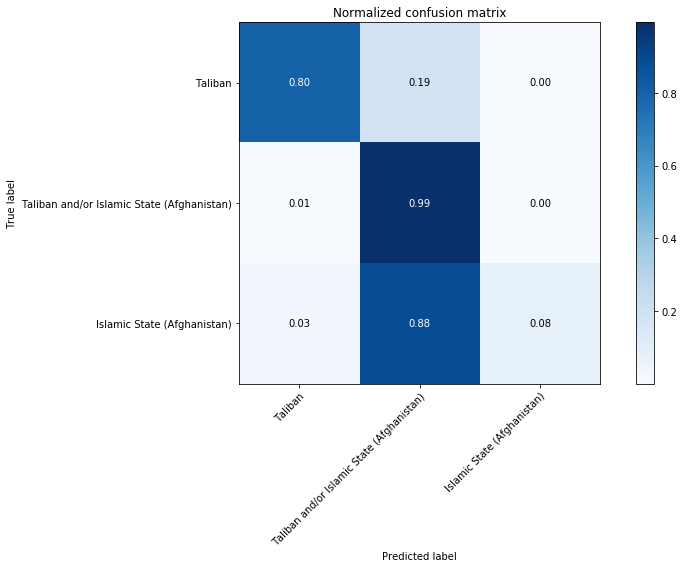

In [27]:
data.plot_confusion_matrix(afg_rebel_groups_df, afg_rebel_groups_rf, dataset_type = 'train', normalize = True)

##### Confusion Matrix for Testing Data [Normalized]

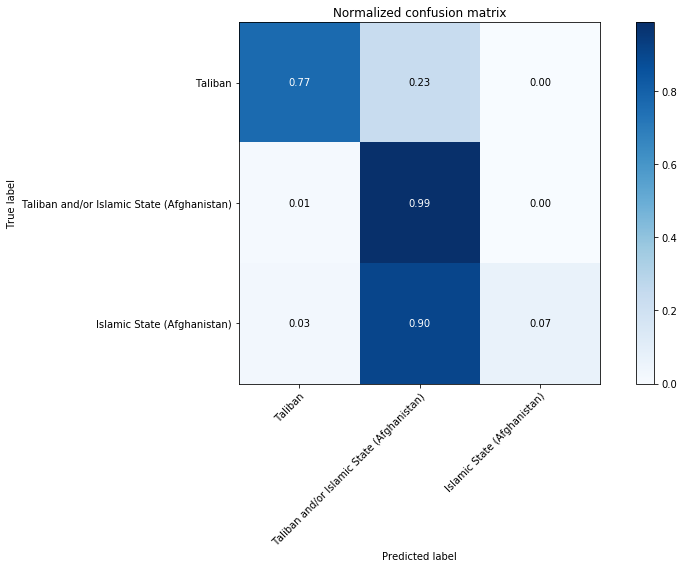

In [29]:
data.plot_confusion_matrix(afg_rebel_groups_df, afg_rebel_groups_rf, dataset_type = 'test', normalize = True)

##### Tests to check accuracy of the model

In [13]:
data.classifier_accuracy(afg_rebel_groups_df, afg_rebel_groups_rf)

{'training_accuracy': 0.8340914013428633,
 'testing_accuracy': 0.8232618583495777,
 'training_F1_weighted': 0.7805860368800424,
 'testing_F1_weighted': 0.7674833570687929,
 'training_precision_weighted': 0.8515754941098571,
 'testing_precision_weighted': 0.8386940263095153,
 'training_recall_weighted': 0.8340914013428633,
 'testing_recall_weighted': 0.8232618583495777}

## Random Forest Model for Classifying Rebel Groups in Southern Asia

##### Load best Random Forest model based of grid search for Southern Asia

In [8]:
southern_asia_rebel_groups_rf = data.load_model('southern_asia')

##### Confusion Matrix for Training Data [Normalized]

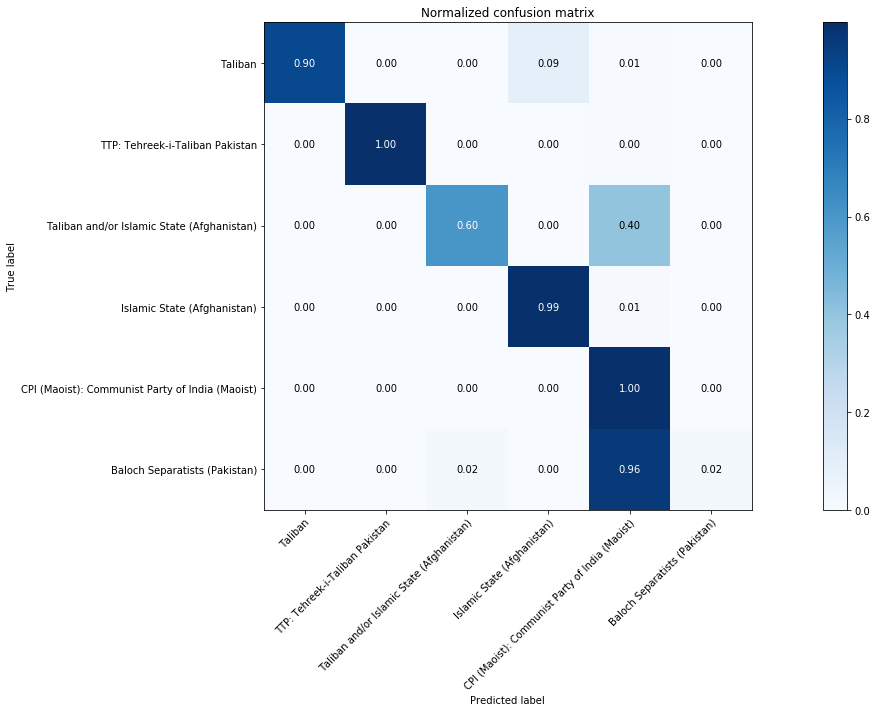

In [9]:
data.plot_confusion_matrix(southern_asia_rebel_groups_df, southern_asia_rebel_groups_rf, dataset_type = 'train', normalize = True)

##### Confusion Matrix for Testing Data [Normalized]

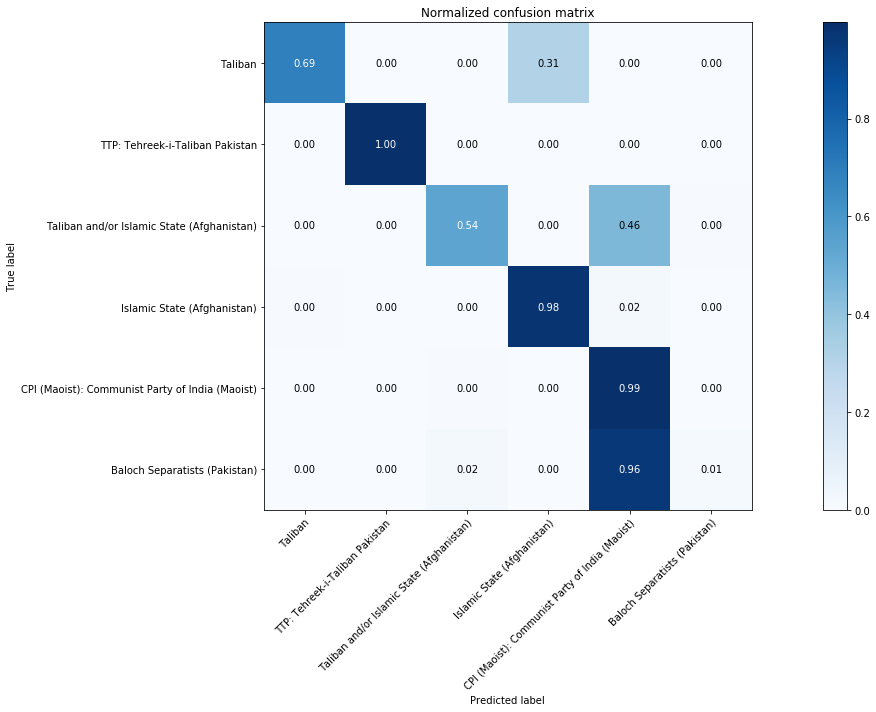

In [10]:
data.plot_confusion_matrix(southern_asia_rebel_groups_df, southern_asia_rebel_groups_rf, dataset_type = 'test', normalize = True)

##### Tests to check accuracy of the model

In [11]:
data.classifier_accuracy(southern_asia_rebel_groups_df, southern_asia_rebel_groups_rf)

{'training_accuracy': 0.8423524022218405,
 'testing_accuracy': 0.8268338773406632,
 'training_F1_weighted': 0.7898185645638188,
 'testing_F1_weighted': 0.7707830293459663,
 'training_precision_weighted': 0.8712670574510711,
 'testing_precision_weighted': 0.8306234964296919,
 'training_recall_weighted': 0.8423524022218405,
 'testing_recall_weighted': 0.8268338773406632}

## Random Forest Model for Classifying Rebel Groups in Asia

##### Load best Random Forest model based of grid search for Asia

In [4]:
asia_rebel_groups_rf = data.load_model('asia')

##### Confusion Matrix for Training Data [Normalized]


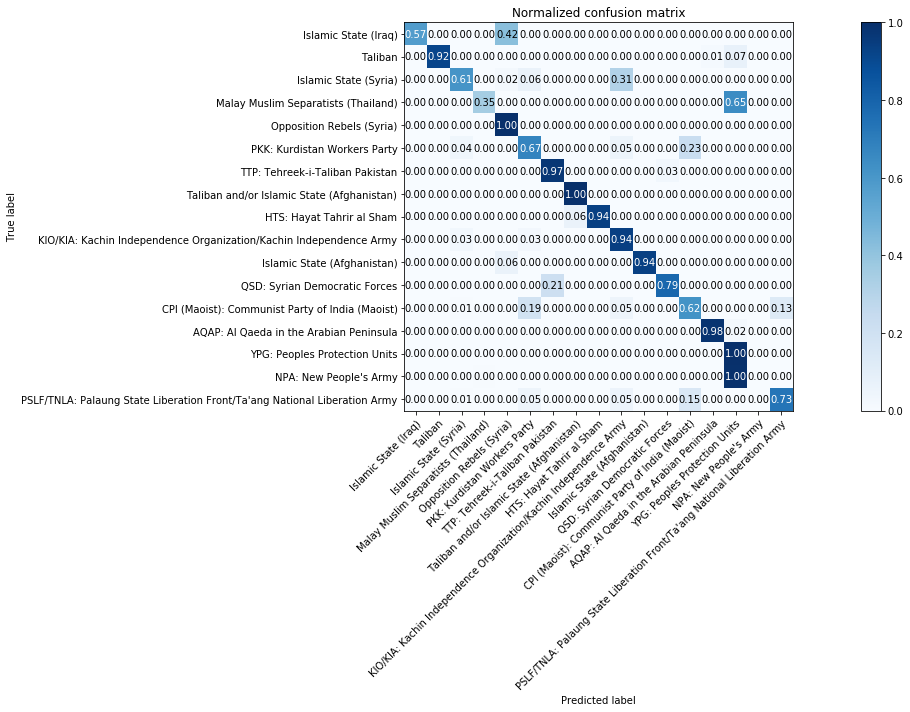

In [5]:
data.plot_confusion_matrix(asia_rebel_groups_df, asia_rebel_groups_rf, dataset_type = 'train', normalize = True)

##### Confusion Matrix for Testing Data [Normalized]

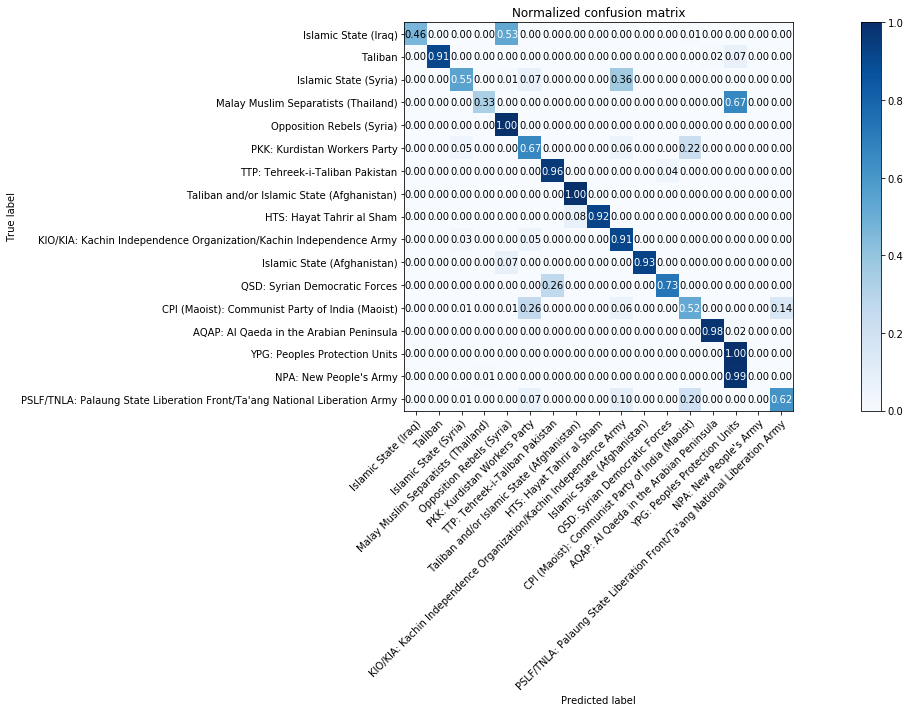

In [6]:
data.plot_confusion_matrix(asia_rebel_groups_df, asia_rebel_groups_rf, dataset_type = 'test', normalize = True)

##### Tests to check accuracy of the model

In [7]:
data.classifier_accuracy(asia_rebel_groups_df, asia_rebel_groups_rf)

{'training_accuracy': 0.853942423468457,
 'testing_accuracy': 0.84090411558669,
 'training_F1_weighted': 0.8372359852046187,
 'testing_F1_weighted': 0.8226387702490333,
 'training_precision_weighted': 0.8441646669875207,
 'testing_precision_weighted': 0.8279729962978163,
 'training_recall_weighted': 0.853942423468457,
 'testing_recall_weighted': 0.84090411558669}

## Random Forest Model for Classifying Islamic State (Type of Rebel Group) in Asia

Create Dataset for Islamic State classification

In [8]:
isis_df = data.filter_data(region = ['Southern Asia', 'Middle East', 'South-Eastern Asia'], rebel_groups= True, actor_name= 'islamic state')

##### Load best Random Forest model based of grid search for ISIS activity in Asia

In [7]:
isis_rf = data.load_model('isis')

##### Confusion Matrix for Training Data [Normalized]


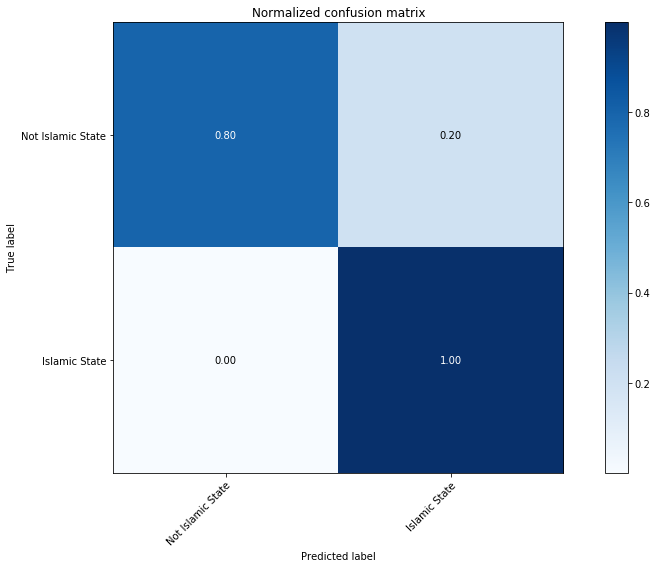

In [9]:
data.plot_confusion_matrix(isis_df, isis_rf, dataset_type = 'train', normalize = True)

##### Confusion Matrix for Testing Data [Normalized]

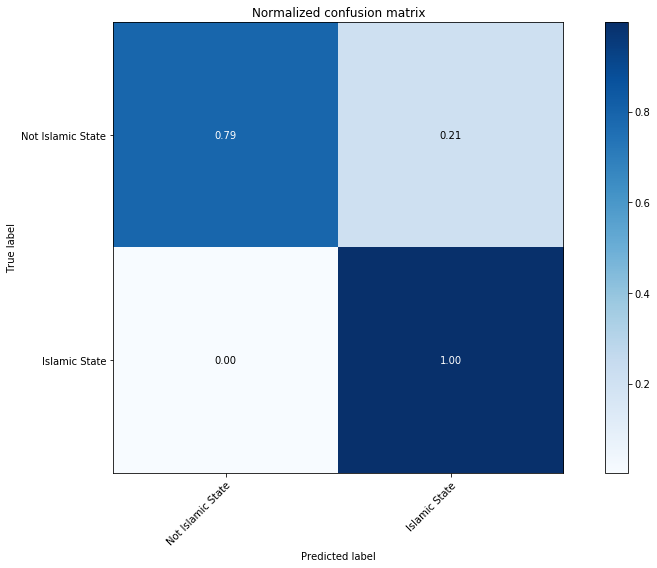

In [10]:
data.plot_confusion_matrix(isis_df, isis_rf, dataset_type = 'test', normalize = True)

##### Tests to check accuracy of the model

In [11]:
data.classifier_accuracy(isis_df, isis_rf)

{'training_accuracy': 0.925958500276882,
 'testing_accuracy': 0.9200664484291787,
 'training_F1_weighted': 0.9238511827444541,
 'testing_F1_weighted': 0.9177113406155695,
 'training_precision_weighted': 0.9330340541392627,
 'testing_precision_weighted': 0.9277676133005858,
 'training_recall_weighted': 0.925958500276882,
 'testing_recall_weighted': 0.9200664484291787}